# Exploratory Data Analysis

In [1]:
from pandas import concat, read_parquet
import seaborn as sns
from data import file
from preprocessing.text import tokenize
from preprocessing.language import Predictor

In [2]:
language = Predictor()

# Data Loading

In [3]:
data_train = read_parquet(file.news_articles_raw_train)
data_test = read_parquet(file.news_articles_raw_test)
data_train_lang = concat([data_train, data_train.text_original.map(language.predict).rename("lang")], axis=1)
data_test_lang = concat([data_test, data_test.text_original.map(language.predict).rename("lang")], axis=1)

# Language Distribution

The language inferred by the fasttext language model is always german.

## Training Set

<AxesSubplot:xlabel='lang', ylabel='count'>

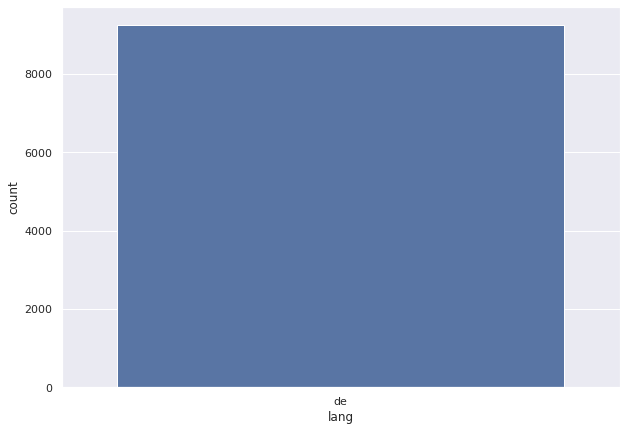

In [4]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.countplot(x="lang", data=data_train_lang)

## Test Set

<AxesSubplot:xlabel='lang', ylabel='count'>

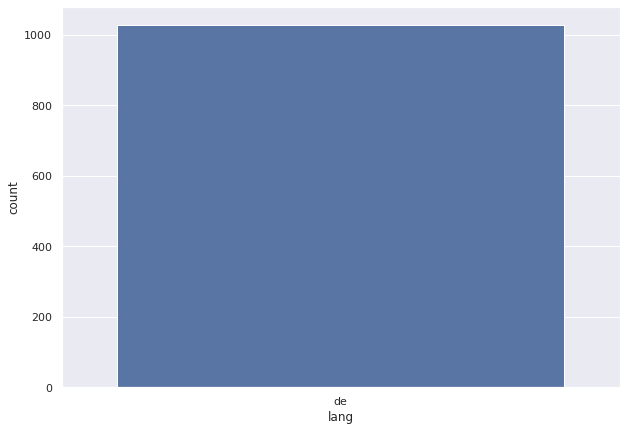

In [5]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.countplot(x="lang", data=data_test_lang)